# Task 2: User Engagement Analysis
  # Task 2: User Engagement Analysis
    This notebook analyzes user engagement patterns in the telecom dataset focusing on:
    - Session frequency
    - Session duration
    - Total traffic (download and upload)

    It perform clustering analysis to identify different user engagement groups and analyze application usage patterns.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('../src')
from database import get_db_connection
from engagement_analysis import (
    get_user_engagement_metrics,
    get_top_users_per_metric,
    perform_kmeans_clustering,
    find_optimal_k,
    get_top_apps_by_usage,
    get_top_users_per_app
)

sns.set_palette('husl')

# Connect to database
conn = get_db_connection()

## 1. User Engagement Metrics Analysis

In [2]:
# Get user engagement metrics
user_metrics = get_user_engagement_metrics(conn)

# Display basic statistics
print("Dataset Overview:")
print(f"Total number of users: {len(user_metrics)}")
display(user_metrics.describe())

# Get top 10 users for each metric
engagement_metrics = ['session_frequency', 'total_duration', 'total_traffic']
top_users = get_top_users_per_metric(user_metrics, engagement_metrics)

for metric, users in top_users.items():
    print(f"\nTop 10 users by {metric}:")
    display(users)

c:\Users\hp\Documents\telleco_week2\notebooks\../src\engagement_analysis.py:29: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql_query(query, connection)


Dataset Overview:
Total number of users: 106857


,msisdn,session_frequency,total_duration,total_traffic,social_media_usage,google_usage,email_usage,youtube_usage,netflix_usage,gaming_usage,other_usage
count,1.068560e+05,106857.000000,1.068570e+05,1.068570e+05,1.068570e+05,1.068570e+05,1.068570e+05,1.068570e+05,1.068570e+05,1.068570e+05,1.068570e+05
mean,4.511474e+10,1.403755,1.468438e+05,6.959272e+08,2.566415e+06,1.095953e+07,3.171225e+06,3.178589e+07,3.176501e+07,6.040820e+08,6.027236e+08
std,2.889423e+12,3.355032,2.892198e+05,1.695706e+09,6.325032e+06,2.630542e+07,7.661339e+06,7.735388e+07,7.709618e+07,1.479703e+09,1.449064e+09
min,3.360100e+10,1.000000,7.142000e+03,3.324901e+07,1.563000e+03,4.033000e+04,1.817600e+04,7.890300e+04,1.845690e+05,3.063580e+05,1.490450e+05
25%,3.365088e+10,1.000000,7.130900e+04,3.585530e+08,1.211309e+06,5.942683e+06,1.674484e+06,1.863145e+07,1.855607e+07,2.880666e+08,2.855649e+08
50%,3.366365e+10,1.000000,1.027410e+05,6.179232e+08,2.303811e+06,9.586186e+06,2.799854e+06,2.680040e+07,2.671955e+07,5.423501e+08,5.398401e+08
75%,3.368344e+10,2.000000,1.727990e+05,8.574358e+08,3.307524e+06,1.321496e+07,3.847205e+06,3.792829e+07,3.797722e+07,7.773115e+08,7.754189e+08
max,8.823971e+14,1066.000000,7.244640e+07,5.312489e+11,1.973817e+09,8.248577e+09,2.399880e+09,2.434073e+10,2.425357e+10,4.614780e+11,4.509784e+11



Top 10 users by session_frequency:


,msisdn,session_frequency
106856,NaN,1066
13526,3.362632e+10,18
6437,3.361489e+10,17
13180,3.362578e+10,17
37052,3.365973e+10,16
76363,3.367588e+10,15
92923,3.376054e+10,15
65118,3.366716e+10,13
666,3.360313e+10,12
1279,3.360452e+10,12



Top 10 users by total_duration:


,msisdn,total_duration
106856,NaN,72446396.0
13180,3.362578e+10,18553754.0
6437,3.361489e+10,9966898.0
92923,3.376054e+10,9279434.0
13526,3.362632e+10,8791927.0
65118,3.366716e+10,8744914.0
50281,3.366284e+10,6614270.0
57160,3.366469e+10,6288730.0
666,3.360313e+10,6287761.0
66029,3.366746e+10,5649882.0



Top 10 users by total_traffic:


,msisdn,total_traffic
106856,NaN,5.312489e+11
6437,3.361489e+10,8.846226e+09
92923,3.376054e+10,8.514774e+09
13180,3.362578e+10,8.499621e+09
13526,3.362632e+10,7.971167e+09
76363,3.367588e+10,7.891111e+09
37052,3.365973e+10,7.705863e+09
63028,3.366646e+10,7.308501e+09
92577,3.376041e+10,7.132371e+09
57241,3.366471e+10,6.872018e+09


## 2. K-means Clustering Analysis (k=3)

Cluster Statistics:


session_frequency                            total_duration  \
                      min   max         mean     sum            min   
cluster                                                               
0                       1     7     1.361945  144087         7142.0   
1                    1066  1066  1066.000000    1066     72446396.0   
2                       1    18     4.569274    4848       567786.0   

                                                total_traffic                \
                max          mean           sum           min           max   
cluster                                                                       
0          783576.0  1.347567e+05  1.425658e+10  3.324901e+07  4.478299e+09   
1        72446396.0  7.244640e+07  7.244640e+07  5.312489e+11  5.312489e+11   
2        18553754.0  1.283934e+06  1.362254e+09  9.705338e+07  8.846226e+09   

                                     
                 mean           sum  
cluster                              
0        6.751148e+08  7.142377e+13  
1        5.312489e+11  5.312489e+11  
2        2.271134e+09  2.409674e+12

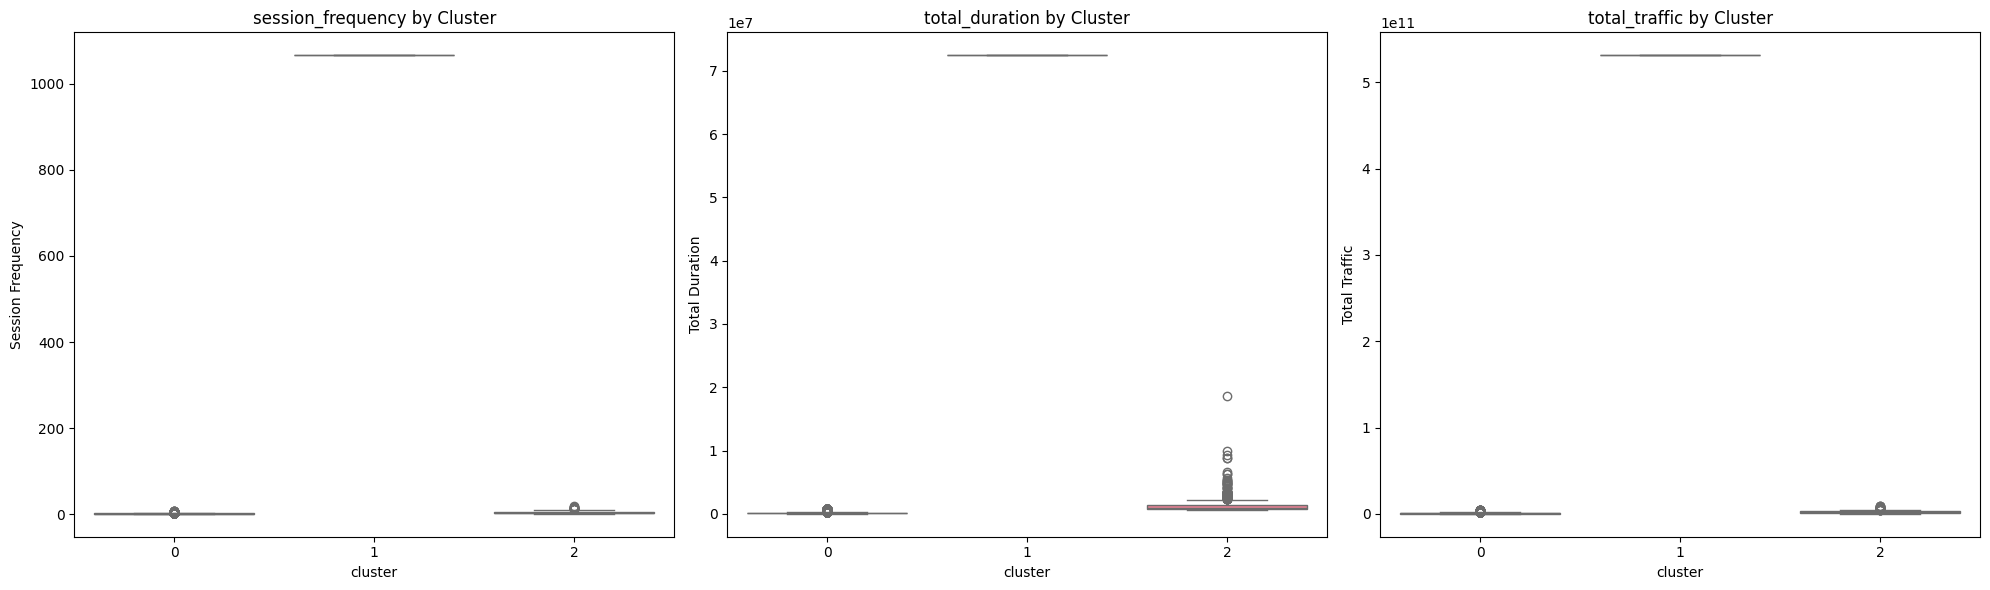


Percentage of users in each cluster:


cluster
0    99.006148
2     0.992916
1     0.000936
Name: proportion, dtype: float64

In [3]:
# Perform clustering
features = ['session_frequency', 'total_duration', 'total_traffic']
df_clustered, cluster_stats, kmeans, X_scaled = perform_kmeans_clustering(user_metrics, features)

print("Cluster Statistics:")
display(cluster_stats)

# Visualize clusters
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

for i, feature in enumerate(features):
    sns.boxplot(x='cluster', y=feature, data=df_clustered, ax=axes[i])
    axes[i].set_title(f'{feature} by Cluster')
    axes[i].set_ylabel(feature.replace('_', ' ').title())

plt.tight_layout()
plt.show()

# Calculate percentage of users in each cluster
cluster_sizes = df_clustered['cluster'].value_counts(normalize=True) * 100
print("\nPercentage of users in each cluster:")
display(cluster_sizes)

## 3. Application Usage Analysis


Top 10 users for Social Media Usage:


,msisdn,social_media_usage
106856,NaN,1.973817e+09
13526,3.362632e+10,4.337478e+07
92923,3.376054e+10,3.978319e+07
37052,3.365973e+10,3.541236e+07
6437,3.361489e+10,2.829454e+07
13180,3.362578e+10,2.713550e+07
65118,3.366716e+10,2.424785e+07
106137,3.378632e+10,2.397492e+07
70960,3.366907e+10,2.380083e+07
666,3.360313e+10,2.307782e+07



Top 10 users for Google Usage:


,msisdn,google_usage
106856,NaN,8.248577e+09
13526,3.362632e+10,1.521919e+08
13180,3.362578e+10,1.423079e+08
6437,3.361489e+10,1.279738e+08
92923,3.376054e+10,1.232231e+08
37052,3.365973e+10,1.165163e+08
106137,3.378632e+10,1.102545e+08
76363,3.367588e+10,1.098605e+08
65118,3.366716e+10,1.050327e+08
94654,3.376127e+10,9.708999e+07



Top 10 users for Email Usage:


,msisdn,email_usage
106856,NaN,2.399880e+09
13526,3.362632e+10,4.241878e+07
6437,3.361489e+10,4.078863e+07
13180,3.362578e+10,4.063397e+07
106137,3.378632e+10,3.631012e+07
37052,3.365973e+10,3.599979e+07
92923,3.376054e+10,3.369377e+07
76363,3.367588e+10,3.151442e+07
60087,3.366546e+10,3.041788e+07
65118,3.366716e+10,3.033580e+07



Top 10 users for Youtube Usage:


,msisdn,youtube_usage
106856,NaN,2.434073e+10
13180,3.362578e+10,4.529588e+08
92923,3.376054e+10,3.962892e+08
6437,3.361489e+10,3.943702e+08
13526,3.362632e+10,3.744830e+08
76363,3.367588e+10,3.174106e+08
65118,3.366716e+10,3.152313e+08
13994,3.362708e+10,3.087908e+08
92577,3.376041e+10,3.031691e+08
86455,3.369879e+10,3.026620e+08



Top 10 users for Netflix Usage:


,msisdn,netflix_usage
106856,NaN,2.425357e+10
37052,3.365973e+10,3.995191e+08
6437,3.361489e+10,3.614010e+08
13180,3.362578e+10,3.569806e+08
92923,3.376054e+10,3.346433e+08
13526,3.362632e+10,3.287257e+08
92577,3.376041e+10,3.183475e+08
65118,3.366716e+10,3.139395e+08
76363,3.367588e+10,3.090932e+08
106137,3.378632e+10,3.059398e+08



Top 10 users for Gaming Usage:


,msisdn,gaming_usage
106856,NaN,4.614780e+11
6437,3.361489e+10,7.749432e+09
92923,3.376054e+10,7.461045e+09
13180,3.362578e+10,7.326673e+09
76363,3.367588e+10,6.970568e+09
13526,3.362632e+10,6.887572e+09
37052,3.365973e+10,6.725559e+09
63028,3.366646e+10,6.646303e+09
92577,3.376041e+10,6.268620e+09
57241,3.366471e+10,6.103856e+09



Top 10 users for Other Usage:


,msisdn,other_usage
106856,NaN,4.509784e+11
13526,3.362632e+10,8.167878e+09
6437,3.361489e+10,7.639264e+09
76363,3.367588e+10,6.798515e+09
13180,3.362578e+10,6.354583e+09
666,3.360313e+10,6.326671e+09
37052,3.365973e+10,6.317415e+09
13936,3.362695e+10,5.305448e+09
13994,3.362708e+10,5.117791e+09
94654,3.376127e+10,5.077779e+09


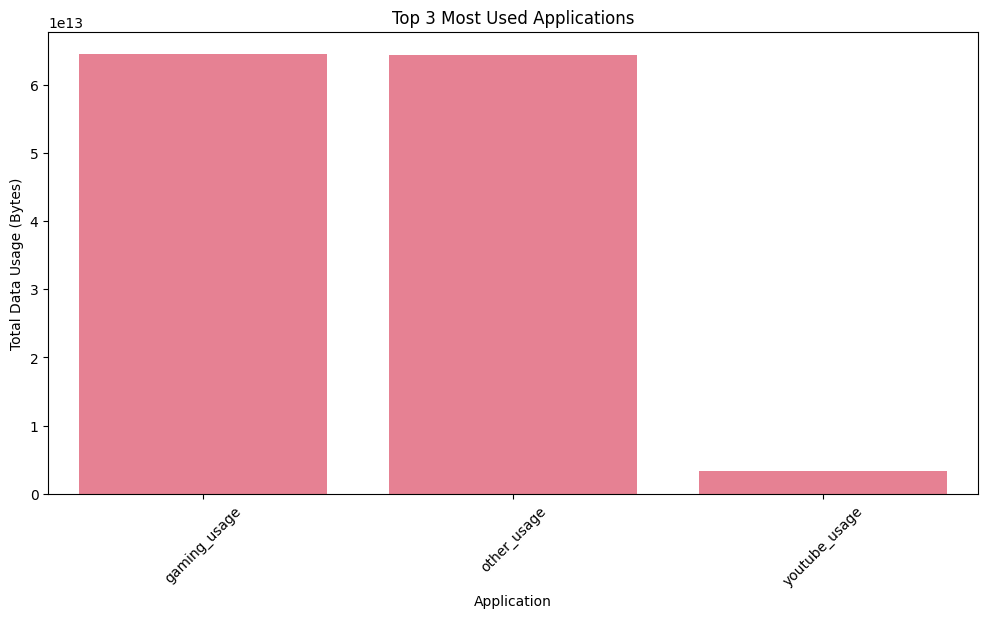

In [4]:
# Get top users per application
top_users_per_app = get_top_users_per_app(user_metrics)

for app, users in top_users_per_app.items():
    print(f"\nTop 10 users for {app.replace('_', ' ').title()}:")
    display(users)

# Get and plot top 3 most used applications
app_usage = get_top_apps_by_usage(user_metrics)
top3_apps = app_usage.head(3)

plt.figure(figsize=(12, 6))
sns.barplot(x=top3_apps.index, y=top3_apps.values)
plt.title('Top 3 Most Used Applications')
plt.xlabel('Application')
plt.ylabel('Total Data Usage (Bytes)')
plt.xticks(rotation=45)
plt.show()

## 4. Finding Optimal K using Elbow Method

Starting clustering analysis on dataset with shape: (106857, 3)
Clustering analysis completed in 57.07 seconds


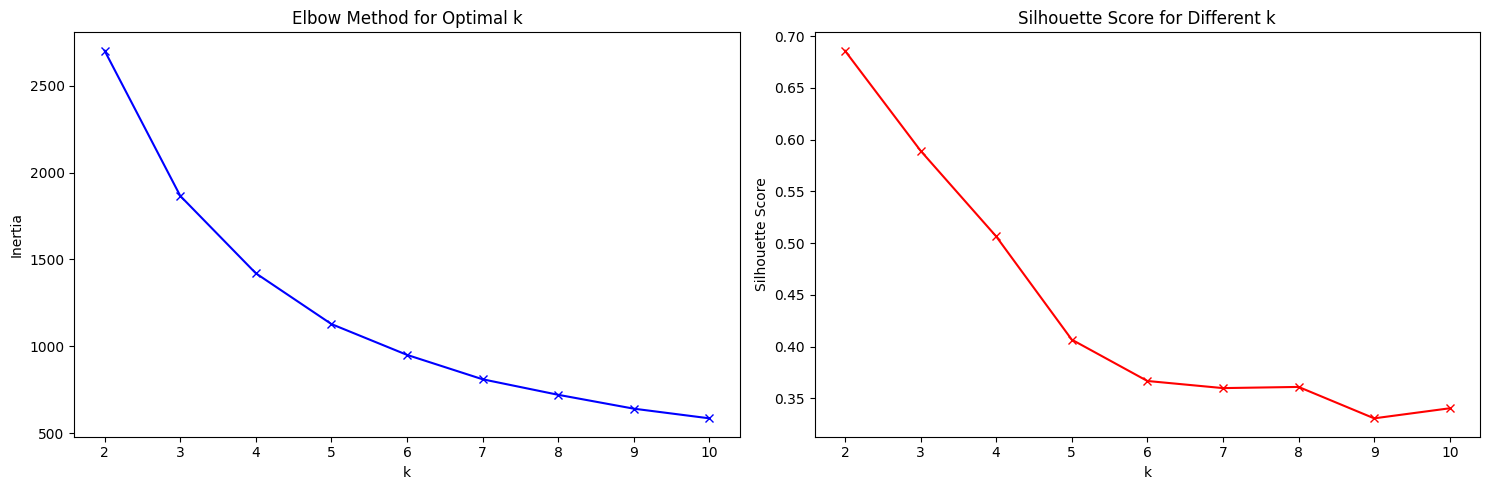


Optimal number of clusters (k) based on silhouette score: 2


,k,inertia,silhouette_score
0,2,2701.793423,0.686004
1,3,1865.885812,0.589386
2,4,1420.127865,0.506619
3,5,1127.664810,0.406842
4,6,950.262269,0.366898
5,7,809.784298,0.360017
6,8,720.402047,0.361152
7,9,640.521581,0.330800
8,10,584.921954,0.340524


In [5]:
from tqdm.notebook import tqdm
import time

print(f"Starting clustering analysis on dataset with shape: {X_scaled.shape}")
start_time = time.time()

# Calculate inertia and silhouette scores for different k values
k_range = range(2, 11)
inertias, silhouette_scores = find_optimal_k(X_scaled, k_range)

end_time = time.time()
print(f"Clustering analysis completed in {end_time - start_time:.2f} seconds")

# Plot results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Elbow curve
ax1.plot(k_range, inertias, 'bx-')
ax1.set_xlabel('k')
ax1.set_ylabel('Inertia')
ax1.set_title('Elbow Method for Optimal k')

# Silhouette scores
ax2.plot(k_range, silhouette_scores, 'rx-')
ax2.set_xlabel('k')
ax2.set_ylabel('Silhouette Score')
ax2.set_title('Silhouette Score for Different k')

plt.tight_layout()
plt.show()

# Find and display optimal k
optimal_k = k_range[np.argmax(silhouette_scores)]
print(f"\nOptimal number of clusters (k) based on silhouette score: {optimal_k}")

# Display all scores for comparison
results_df = pd.DataFrame({
    'k': list(k_range),
    'inertia': inertias,
    'silhouette_score': silhouette_scores
})
display(results_df)